In [1]:
from carbon.helpers.cryptocompare import CryptoCompare

print( "{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CryptoCompare))

CryptoCompare v1.4 (01/Feb/2023)


# Crypto Compare

https://min-api.cryptocompare.com/documentation

Note: `CryptoCompare` expects the API in an environment variable called `CCAPIKEY`. To set in bash, run

    export CCAPIKEY=<value>
    jupyter notebook
    
Alternatively you can supply the API key directly to the object (via `apikey=XXX`), but this is not recommended because of its security implications.

In [2]:
CCA = CryptoCompare(apikey=True)
try:
    CCA = CryptoCompare()
except RuntimeError as e:
    CC = CCA
    print(e)
print("[CryptoCompare] key digest", CC.keydigest[:4], CCA.keydigest[:4])

Can't find API key CCAPIKEY in environment variables.
Use `export CCAPIKEY=<value>` to set it BEFORE you launch Jupyter
API key not present. Use `export CCAPIKEY=<value>` to set it before launching Jupyter.
[CryptoCompare] key digest 0000 0000


## Rate limit

In [3]:
CC.query_ratelimit()

[query] https://min-api.cryptocompare.com/stats/rate/limit {} [0000]


{'calls_made': {'second': 1, 'minute': 1, 'hour': 5, 'day': 5, 'month': 7},
 'calls_left': {'second': 19,
  'minute': 299,
  'hour': 2995,
  'day': 7495,
  'month': 49993}}

In [4]:
CCA.query_ratelimit()

[query] https://min-api.cryptocompare.com/stats/rate/limit {} [0000]


{'calls_made': {'second': 1, 'minute': 2, 'hour': 6, 'day': 6, 'month': 8},
 'calls_left': {'second': 19,
  'minute': 298,
  'hour': 2994,
  'day': 7494,
  'month': 49992}}

## Exchanges and pairs

In [5]:
data = CC.cache_allexchanges()
data["exchanges"].keys()

dict_keys(['ABCC', 'ACX', 'Abucoins', 'AidosMarket', 'BCEX', 'BTC38', 'BTCAlpha', 'BTCBOX', 'BTCChina', 'BTCE', 'BTCExchange', 'BTCMarkets', 'BTCTurk', 'BTCXIndia', 'BTER', 'BXinth', 'Bgogo', 'Bibox', 'BigONE', 'Binance', 'Binanceje', 'Bit2C', 'BitBank', 'BitBay', 'BitFlip', 'BitGrail', 'BitMarket', 'BitMart', 'BitSquare', 'BitTrex', 'BitZ', 'BitexBook', 'Bitfinex', 'Bitforex', 'Bithumb', 'Bitinfi', 'Bitkub', 'Bitlish', 'Bitmex', 'Bitpoint', 'Bitsane', 'Bitshares', 'Bitso', 'Bitstamp', 'Blackturtle', 'Bleutrade', 'Bluebelt', 'Braziliex', 'Buda', 'CBX', 'CCCAGG', 'CCEDK', 'CCEX', 'CHBTC', 'Catex', 'Cexio', 'ChileBit', 'Codex', 'CoinBene', 'CoinCorner', 'CoinDeal', 'CoinEx', 'CoinFalcon', 'CoinHub', 'CoinJar', 'CoinPulse', 'CoinTiger', 'Coinbase', 'Coincap', 'Coincheck', 'Coinfloor', 'Coinmate', 'Coinnest', 'Coinone', 'Coinroom', 'CoinsBank', 'Coinsbit', 'Coinse', 'Coinsetter', 'Cryptagio', 'CryptoBulls', 'CryptoCarbon', 'CryptoExchangeWS', 'CryptoX', 'Cryptonit', 'Cryptopia', 'Cryptsy',

In [6]:
", ".join([x for x in data["exchanges"] if data["exchanges"][x].get("isTopTier")])

'ABCC, BTCBOX, BTCMarkets, BTCTurk, Bibox, BigONE, Binance, Bit2C, BitBank, BitBay, BitMart, BitTrex, Bitfinex, Bithumb, Bitkub, Bitso, Bitstamp, CBX, Cexio, CoinCorner, CoinEx, CoinJar, Coinbase, Coincheck, Coinmate, Coinone, Coinsbit, DigiFinex, Exmo, Gateio, Gemini, HitBTC, HuobiPro, IndependentReserve, Korbit, Kraken, Kucoin, LAToken, Liquid, Luno, Lykke, NDAX, OKCoin, OKEX, P2PB2B, Paymium, TheRockTrading, Upbit, Vaultoro, ZB, ZBG, Zaif, aax, ataix, bequant, binanceusa, bitFlyer, bitbuy, bitflyereu, bitflyerus, bithumbglobal, bitpanda, blockchaincom, btse, bullish, coinfield, crosstower, cryptodotcom, currency, dcoin, decoin, eidoo, erisx, etoro, ftxus, gopax, huobijapan, huobikorea, indodax, itBit, lmax, nominex, probit, valr, zebitex'

In [7]:
", ".join([x for x in data["exchanges"] if data["exchanges"][x].get("isActive")])

'ABCC, AidosMarket, BCEX, BTCAlpha, BTCBOX, BTCExchange, BTCMarkets, BTCTurk, Bgogo, Bibox, BigONE, Binance, Binanceje, Bit2C, BitBank, BitBay, BitMart, BitSquare, BitTrex, BitZ, BitexBook, Bitfinex, Bitforex, Bithumb, Bitkub, Bitmex, Bitso, Bitstamp, Blackturtle, Bleutrade, Braziliex, Buda, CBX, CCCAGG, Catex, Cexio, CoinBene, CoinCorner, CoinDeal, CoinEx, CoinFalcon, CoinHub, CoinJar, Coinbase, Coincheck, Coinfloor, Coinmate, Coinone, Coinsbit, CryptoCarbon, DDEX, DSX, DigiFinex, EXRATES, EXX, Everbloom, Exenium, Exmo, FCoin, Gateio, Gemini, Globitex, Graviex, HADAX, Hikenex, HitBTC, HuobiPro, IDEX, IQFinex, IndependentReserve, Korbit, Kraken, Kucoin, Kuna, LAToken, LBank, Liqnet, Liquid, LiveCoin, LocalBitcoins, Luno, Lykke, MercadoBitcoin, Minebit, Nebula, Nexchange, Nlexch, Nuex, OKCoin, OKEX, P2PB2B, Paymium, Poloniex, Remitano, RightBTC, SafeCoin, SingularityX, StocksExchange, Switcheo, TheRockTrading, Tidex, TokenStore, Tokenomy, TrustDEX, Upbit, Vaultoro, WavesDEX, Yobit, ZB, 

In [8]:
exchange = "Coinbase"
print(data["exchanges"][exchange].keys())
", ".join(data["exchanges"][exchange]["pairs"].keys())

dict_keys(['pairs', 'isActive', 'isTopTier'])


'ETH, XRP, ORN, C98, SOL, FORTH, RNDR, JUP, 1INCH, BTRST, GLM, ERN, DESO, LIT, DASH, WCFG, NCT, MINA, FLOW, MATIC, BAND, REQ, DOGE, AST, ETHERNITY, POND, ENJ, APT, MANA, MKR, TONE, BADGER, GFI, RAI, JASMY, DYP, ETC, ENS, DIA, CGLD, CRV, MASK, ARPA, LTC, OMG, ALGO, ZEN, UPI, USTC, NKN, MTL, ZEC, BTC, UNI, ATOM, QNT, PERP, SAI, SPELL, IDEX, LRC, BNT, CRO, ALEPH, PRO, TRAC, GALA, SUPER, BOBA, ILV, ATA, ACH, POWR, KNC, DDX, QI, LOOM, PNG, POLS, METIS, GTC, CRPT, MEDIA, STORJ, BCH, CVC, GRAPH, DEXT, INJ, FIDA, AGLD, WLUNC, INDEX, XLM, POLY, SKL, SHPING, AVT, EGLD, MAGIC, MIR, NU, SHIB, SNX, LCX, ICP, EOS, CLV, GRT, STG, XYO, CELO, AXS, SUSHI, CELR, BAT, CTX, FOX, LPT, LINK, RAIREF, BOND, PRQ, CHZ, DOT, AIOZ, RLY, RARI, AUCTION, FIS, SYN, USDT, KAVA, AURORA, QSP, LQTY, ELA, FIL, FORT, USDC, UMA, ADA, NMR, TRIBE, HFT, WAMPL, NEAR, FARM, XTZ, FUNX, DAI, BAL, RLC, XCN, AMP, RAD, COMP, TRU, YFII, IOTX, STX, SYLO, COTI, TIME, ANKR, MLN, REN, MATH, ALCX, GALATA, MPL, DREP, MUSE, KRL, SAND, TRB, GM

In [9]:
data["exchanges"][exchange]["isTopTier"]

True

## Coinlist

In [31]:
data = CC.cache_coinlist()
data_keys = tuple(data.keys())
len(data_keys)

8374

In [11]:
", ". join(data_keys[100:120])

'GUE, HAL, HBN, HUC, HVC, HYP, ICB, IFC, IXC, JBS, JKC, JUDGE, KDC, KEYC, LK7, LKY, LSD, LTB, LTCD, LTCX'

In [12]:
data["BTC"].keys()

dict_keys(['Id', 'Url', 'ImageUrl', 'ContentCreatedOn', 'Name', 'Symbol', 'CoinName', 'FullName', 'Description', 'AssetTokenStatus', 'Algorithm', 'ProofType', 'SortOrder', 'Sponsored', 'Taxonomy', 'Rating', 'IsTrading', 'TotalCoinsMined', 'CirculatingSupply', 'BlockNumber', 'NetHashesPerSecond', 'BlockReward', 'BlockTime', 'AssetLaunchDate', 'AssetWhitepaperUrl', 'AssetWebsiteUrl', 'MaxSupply', 'MktCapPenalty', 'IsUsedInDefi', 'IsUsedInNft', 'PlatformType', 'DecimalPoints', 'AlgorithmType', 'Difficulty'])

## ISO currency symbols

In [13]:
CCA.ccycodes()

'AED, AFN, ALL, AMD, ANG, AOA, ARS, AUD, AWG, AZN, BAM, BBD, BDT, BGN, BHD, BIF, BMD, BND, BOB, BOV, BRL, BSD, BTN, BWP, BYN, BZD, CAD, CDF, CHE, CHF, CHW, CLF, CLP, CNY, COP, COU, CRC, CUC, CUP, CVE, CZK, DJF, DKK, DOP, DZD, EGP, ERN, ETB, EUR, FJD, FKP, GBP, GEL, GHS, GIP, GMD, GNF, GTQ, GYD, HKD, HNL, HRK, HTG, HUF, IDR, ILS, INR, IQD, IRR, ISK, JMD, JOD, JPY, KES, KGS, KHR, KMF, KPW, KRW, KWD, KYD, KZT, LAK, LBP, LKR, LRD, LSL, LYD, MAD, MDL, MGA, MKD, MMK, MNT, MOP, MRU, MUR, MVR, MWK, MXN, MXV, MYR, MZN, NAD, NGN, NIO, NOK, NPR, NZD, OMR, PAB, PEN, PGK, PHP, PKR, PLN, PYG, QAR, RON, RSD, RUB, RWF, SAR, SBD, SCR, SDG, SEK, SGD, SHP, SLL, SOS, SRD, SSP, STN, SVC, SYP, SZL, THB, TJS, TMT, TND, TOP, TRY, TTD, TWD, TZS, UAH, UGX, USD, USN, UYI, UYU, UYW, UZS, VES, VND, VUV, WST, XAF, XAG, XAU, XCD, XDR, XOF, XPD, XPF, XPT, XSU, XUA, YER, ZAR, ZMW, ZWL'

In [14]:
CCA.ccycodes(symonly=False).head()

,Country,Name,Symbol
0,AFGHANISTAN,Afghani,AFN
1,ÅLAND ISLANDS,Euro,EUR
2,ALBANIA,Lek,ALL
3,ALGERIA,Algerian Dinar,DZD
4,AMERICAN SAMOA,US Dollar,USD


## Index list

In [15]:
data = CC.cache_indexlist()
data.keys()

dict_keys(['BTCA', 'BVIN', 'BTCB', 'ETHB', 'CCBYDOT', 'CCBYSOL', 'CCBYADA', 'CCBYAVAX', 'CCBYATOM'])

In [16]:
data["ETHB"]

{'name': 'FICAS Ethereum Fund',
 'description': '',
 'quote_currency': 'CHF',
 'index_market_name': 'CCNAV',
 'index_market_underlying_name': 'CCMVDA',
 'day_close_in_seconds': 61200}

## Freqly pair (= daily, hourly, minutely pair)

### daily

In [17]:
df = CCA.query_freqlypair(freq=CCA.FREQ_DAILY, fsym="BTC", tsym="USD")
df.head()

[query] https://min-api.cryptocompare.com/data/v2/histoday {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000} [0000]


,open,close,high,low,volumefrom,volumeto
datetime,,,,,,
2017-09-06,4409.08,4618.71,4660.04,4401.53,110931.13,5.047172e+08
2017-09-07,4618.71,4635.60,4690.55,4493.20,70531.23,3.249399e+08
2017-09-08,4635.60,4326.45,4699.59,4130.88,180364.02,7.868199e+08
2017-09-09,4326.45,4335.13,4402.15,4185.33,77087.34,3.321953e+08
2017-09-10,4335.13,4245.89,4338.08,4032.15,108075.24,4.512444e+08


In [18]:
df = CCA.query_dailypair(fsym="BTC", tsym="USD")
df.head()

[query] https://min-api.cryptocompare.com/data/v2/histoday {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000} [0000]


,open,close,high,low,volumefrom,volumeto
datetime,,,,,,
2017-09-06,4409.08,4618.71,4660.04,4401.53,110931.13,5.047172e+08
2017-09-07,4618.71,4635.60,4690.55,4493.20,70531.23,3.249399e+08
2017-09-08,4635.60,4326.45,4699.59,4130.88,180364.02,7.868199e+08
2017-09-09,4326.45,4335.13,4402.15,4185.33,77087.34,3.321953e+08
2017-09-10,4335.13,4245.89,4338.08,4032.15,108075.24,4.512444e+08


### hourly

In [19]:
df = CCA.query_freqlypair(freq=CCA.FREQ_HOURLY, fsym="BTC", tsym="USD")
df.head()

[query] https://min-api.cryptocompare.com/data/v2/histohour {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000} [0000]


,open,close,high,low,volumefrom,volumeto
datetime,,,,,,
2022-12-06 03:00:00,17034.55,17004.26,17057.69,16999.44,1448.69,24669527.28
2022-12-06 04:00:00,17004.26,17004.52,17013.21,16972.56,1706.89,29008979.31
2022-12-06 05:00:00,17004.52,16978.42,17008.07,16968.47,1011.79,17188532.28
2022-12-06 06:00:00,16978.42,17004.41,17020.30,16965.02,1173.96,19956857.03
2022-12-06 07:00:00,17004.41,17003.74,17019.45,16993.75,924.54,15723047.47


In [20]:
df = CCA.query_hourlypair(fsym="BTC", tsym="USD")
df.head()

[query] https://min-api.cryptocompare.com/data/v2/histohour {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000} [0000]


,open,close,high,low,volumefrom,volumeto
datetime,,,,,,
2022-12-06 03:00:00,17034.55,17004.26,17057.69,16999.44,1448.69,24669527.28
2022-12-06 04:00:00,17004.26,17004.52,17013.21,16972.56,1706.89,29008979.31
2022-12-06 05:00:00,17004.52,16978.42,17008.07,16968.47,1011.79,17188532.28
2022-12-06 06:00:00,16978.42,17004.41,17020.30,16965.02,1173.96,19956857.03
2022-12-06 07:00:00,17004.41,17003.74,17019.45,16993.75,924.54,15723047.47


### minutely

In [21]:
df = CCA.query_freqlypair(freq=CCA.FREQ_MINUTELY, fsym="BTC", tsym="USD")
df.head()

[query] https://min-api.cryptocompare.com/data/v2/histominute {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000} [0000]


,open,close,high,low,volumefrom,volumeto
datetime,,,,,,
2023-02-26 02:02:00,23113.78,23112.50,23114.67,23112.34,1.263,29186.26
2023-02-26 02:03:00,23112.50,23114.21,23114.24,23112.50,3.870,89452.28
2023-02-26 02:04:00,23114.21,23113.72,23114.49,23113.09,1.134,26218.46
2023-02-26 02:05:00,23113.72,23110.66,23114.23,23110.66,5.503,127161.57
2023-02-26 02:06:00,23110.66,23100.52,23110.66,23100.42,11.990,276913.56


In [22]:
df = CCA.query_minutelypair(fsym="BTC", tsym="USD")
df.head()

[query] https://min-api.cryptocompare.com/data/v2/histominute {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000} [0000]


,open,close,high,low,volumefrom,volumeto
datetime,,,,,,
2023-02-26 02:02:00,23113.78,23112.50,23114.67,23112.34,1.263,29186.26
2023-02-26 02:03:00,23112.50,23114.21,23114.24,23112.50,3.870,89452.28
2023-02-26 02:04:00,23114.21,23113.72,23114.49,23113.09,1.134,26218.46
2023-02-26 02:05:00,23113.72,23110.66,23114.23,23110.66,5.503,127161.57
2023-02-26 02:06:00,23110.66,23100.52,23110.66,23100.42,11.990,276913.56


### docs

In [23]:
help(CCA.query_freqlypair)

Help on method query_freqlypair in module carbon.helpers.cryptocompare:

query_freqlypair(freq, fsym=None, tsym=None, e=None, limit=False, toTs=None, aspandas=True) method of carbon.helpers.cryptocompare.CryptoCompare instance
    endpoints = /data/v2/histoday, /data/v2/histohour, /data/v2/histominute
    
    :freq:     FREQ_DAILY/FD, FREQ_HOURLY/FH, or FREQ_MINUTELY/FM
    :fsym:     cryptocurrency symbol of interest
    :tsym:     currency symbol to convert into
    :e:        exchange to obtain data from
    :limit:    number of data points to return (max: 2000; False defaults to that number)
    :toTs:     returns historical data BEFORE that timestamp
               timestamp format either 1452680400 or pd.Timestamp compatible string 
    
    https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistoday
    https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistohour
    https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataH

In [24]:
help(CCA.query_minutelypair)

Help on method query_minutelypair in module carbon.helpers.cryptocompare:

query_minutelypair(*args, **kwargs) method of carbon.helpers.cryptocompare.CryptoCompare instance
    alias for query_freqlypair(FREQ_MINUTELY, ...)



## Aggregate query

In [25]:
r = CCA.aggr_query(
    "ETC/USD, BTC/USD", 
    fields=[CCA.FIELD_OPEN, CCA.FIELD_CLOSE], 
    freq=CCA.FREQ_HOURLY)
r.keys()

[aggr_query] fields ['open', 'close']
[aggr_query] pairs (pair(tknb='ETC', tknq='USD'), pair(tknb='BTC', tknq='USD'))
[aggr_query] Querying for raw table 2
[query] https://min-api.cryptocompare.com/data/v2/histohour {'fsym': 'ETC', 'tsym': 'USD', 'limit': 2000} [0000]
[query] https://min-api.cryptocompare.com/data/v2/histohour {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000} [0000]
[aggr_query] Creating aggregate table


dict_keys(['gaggr', 'aggr', 'rawaggr', 'raw'])

In [26]:
r["rawaggr"]

ETC/USD                                             \
                       open  close   high    low volumefrom   volumeto   
datetime                                                                 
2022-12-06 03:00:00   19.46  19.44  19.51  19.44    1774.54   34564.36   
2022-12-06 04:00:00   19.44  19.38  19.45  19.26    7724.63  149387.04   
2022-12-06 05:00:00   19.38  19.32  19.38  19.30    2274.94   43990.71   
2022-12-06 06:00:00   19.32  19.37  19.39  19.30    1609.11   31107.76   
2022-12-06 07:00:00   19.37  19.41  19.42  19.36    1252.18   24308.95   
...                     ...    ...    ...    ...        ...        ...   
2023-02-27 07:00:00   21.16  21.17  21.25  21.16    3086.49   65481.76   
2023-02-27 08:00:00   21.17  21.13  21.21  21.08     690.58   14609.29   
2023-02-27 09:00:00   21.13  21.15  21.20  21.08     613.59   12988.81   
2023-02-27 10:00:00   21.17  21.09  21.16  21.05    2409.46   50817.04   
2023-02-27 11:00:00   21.11  21.18  21.18  21.09     493.63   10439.28   

                      BTC/USD                                           \
                         open     close      high       low volumefrom   
datetime                                                                 
2022-12-06 03:00:00  17034.55  17004.26  17057.69  16999.44    1448.69   
2022-12-06 04:00:00  17004.26  17004.52  17013.21  16972.56    1706.89   
2022-12-06 05:00:00  17004.52  16978.42  17008.07  16968.47    1011.79   
2022-12-06 06:00:00  16978.42  17004.41  17020.30  16965.02    1173.96   
2022-12-06 07:00:00  17004.41  17003.74  17019.45  16993.75     924.54   
...                       ...       ...       ...       ...        ...   
2023-02-27 07:00:00  23410.03  23426.99  23451.39  23407.66     678.43   
2023-02-27 08:00:00  23426.99  23360.29  23452.36  23350.13     963.99   
2023-02-27 09:00:00  23360.29  23393.24  23433.65  23344.35     701.08   
2023-02-27 10:00:00  23393.24  23382.08  23412.94  23355.60     513.68   
2023-02-27 11:00:00  23382.08  23417.23  23417.23  23375.52     165.69   

                                  
                        volumeto  
datetime                          
2022-12-06 03:00:00  24669527.28  
2022-12-06 04:00:00  29008979.31  
2022-12-06 05:00:00  17188532.28  
2022-12-06 06:00:00  19956857.03  
2022-12-06 07:00:00  15723047.47  
...                          ...  
2023-02-27 07:00:00  15899813.44  
2023-02-27 08:00:00  22553666.91  
2023-02-27 09:00:00  16395968.31  
2023-02-27 10:00:00  12012568.36  
2023-02-27 11:00:00   3877276.34  

[2001 rows x 12 columns]

In [27]:
r["raw"]["ETC/USD"]

,open,close,high,low,volumefrom,volumeto
datetime,,,,,,
2022-12-06 03:00:00,19.46,19.44,19.51,19.44,1774.54,34564.36
2022-12-06 04:00:00,19.44,19.38,19.45,19.26,7724.63,149387.04
2022-12-06 05:00:00,19.38,19.32,19.38,19.30,2274.94,43990.71
2022-12-06 06:00:00,19.32,19.37,19.39,19.30,1609.11,31107.76
2022-12-06 07:00:00,19.37,19.41,19.42,19.36,1252.18,24308.95
...,...,...,...,...,...,...
2023-02-27 07:00:00,21.16,21.17,21.25,21.16,3086.49,65481.76
2023-02-27 08:00:00,21.17,21.13,21.21,21.08,690.58,14609.29
2023-02-27 09:00:00,21.13,21.15,21.20,21.08,613.59,12988.81


In [28]:
r["aggr"]["close"]

close          
                    ETC/USD   BTC/USD
datetime                             
2022-12-06 03:00:00   19.44  17004.26
2022-12-06 04:00:00   19.38  17004.52
2022-12-06 05:00:00   19.32  16978.42
2022-12-06 06:00:00   19.37  17004.41
2022-12-06 07:00:00   19.41  17003.74
...                     ...       ...
2023-02-27 07:00:00   21.17  23426.99
2023-02-27 08:00:00   21.13  23360.29
2023-02-27 09:00:00   21.15  23393.24
2023-02-27 10:00:00   21.09  23382.08
2023-02-27 11:00:00   21.18  23417.23

[2001 rows x 2 columns]

In [29]:
r["gaggr"]

open             close          
                    ETC/USD   BTC/USD ETC/USD   BTC/USD
datetime                                               
2022-12-06 03:00:00   19.46  17034.55   19.44  17004.26
2022-12-06 04:00:00   19.44  17004.26   19.38  17004.52
2022-12-06 05:00:00   19.38  17004.52   19.32  16978.42
2022-12-06 06:00:00   19.32  16978.42   19.37  17004.41
2022-12-06 07:00:00   19.37  17004.41   19.41  17003.74
...                     ...       ...     ...       ...
2023-02-27 07:00:00   21.16  23410.03   21.17  23426.99
2023-02-27 08:00:00   21.17  23426.99   21.13  23360.29
2023-02-27 09:00:00   21.13  23360.29   21.15  23393.24
2023-02-27 10:00:00   21.17  23393.24   21.09  23382.08
2023-02-27 11:00:00   21.11  23382.08   21.18  23417.23

[2001 rows x 4 columns]

In [30]:
help(CCA.aggr_query)

Help on method aggr_query in module carbon.helpers.cryptocompare:

aggr_query(pairs, fields=None, incl_raw=True, incl_raw_aggr=True, incl_grand_aggr=True, freq=None, **kwargs) method of carbon.helpers.cryptocompare.CryptoCompare instance
    gets the data for pairs from the API and converts it into tables 
    
    :pairs:             the pairs to download, either comma separeted "ETH/USD, BTC/GBP, ..." 
                        or as tuple of tuples (("ETH", "USD"), ...)
    :fields:            the fields for which to create aggredate data frames, either comma separated
                        or as tuple/list; use FREQ_CLOSE and other FIELD_XXX constants here
    :incl_raw:          whether to include the individual raw data frames
    :incl_raw_aggr:     whether to include the aggregate raw data frame
    :incl_grand_aggr:   whether to include a grand aggregate (with double col name)
    :freq:              the data frequency [FREQ_DAILY (default), FREQ_HOURLY, FREQ_MINUTELY] 
    :k

## Staked ETH

In [34]:
"STETH" in data_keys

True

In [36]:
r = CCA.aggr_query(
    "STETH/ETH", 
    fields=[CCA.FIELD_CLOSE], 
    freq=CCA.FREQ_DAILY)
r.keys()

[aggr_query] fields ['close']
[aggr_query] pairs (pair(tknb='STETH', tknq='ETH'),)
[aggr_query] Querying for raw table 1
[query] https://min-api.cryptocompare.com/data/v2/histoday {'fsym': 'STETH', 'tsym': 'ETH', 'limit': 2000} [0000]
[aggr_query] Creating aggregate table


dict_keys(['gaggr', 'aggr', 'rawaggr', 'raw'])

,close
,STETH/ETH
datetime,
2017-09-06,0.0000
2017-09-07,0.0000
2017-09-08,0.0000
2017-09-09,0.0000
2017-09-10,0.0000
...,...
2023-02-23,0.9936
2023-02-24,0.9928


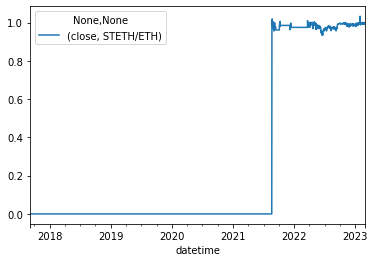

In [42]:
r["aggr"]["close"].plot()
r["aggr"]["close"]

In [45]:
rh = CCA.aggr_query(
    "STETH/ETH", 
    fields=[CCA.FIELD_CLOSE], 
    freq=CCA.FREQ_HOURLY)
rh.keys()

[aggr_query] fields ['close']
[aggr_query] pairs (pair(tknb='STETH', tknq='ETH'),)
[aggr_query] Querying for raw table 1
[query] https://min-api.cryptocompare.com/data/v2/histohour {'fsym': 'STETH', 'tsym': 'ETH', 'limit': 2000} [0000]
[aggr_query] Creating aggregate table


dict_keys(['gaggr', 'aggr', 'rawaggr', 'raw'])

,close
,STETH/ETH
datetime,
2022-12-06 03:00:00,0.9887
2022-12-06 04:00:00,0.9896
2022-12-06 05:00:00,0.9889
2022-12-06 06:00:00,0.9928
2022-12-06 07:00:00,0.9866
...,...
2023-02-27 07:00:00,0.9998
2023-02-27 08:00:00,0.9998


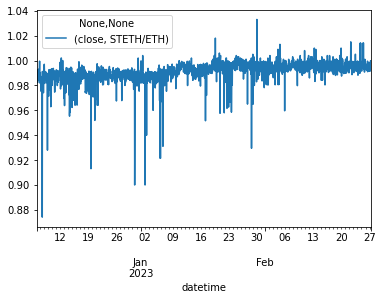

In [46]:
rh["aggr"]["close"].plot()
rh["aggr"]["close"]